<a href="https://colab.research.google.com/github/HarveyEby/PYTHON-DATA-SCIENCE-splitting-data-into-training-and-testing-set/blob/main/Heart_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      biking    smoking  heart_disease
0  30.801246  10.896608      11.769423
1  65.129215   2.219563       2.854081
2   1.959665  17.588331      17.177803
3  44.800196   2.802559       6.816647
4  69.428454  15.974505       4.062224


Text(0.5, 0, '`Heart disease (% pop)')

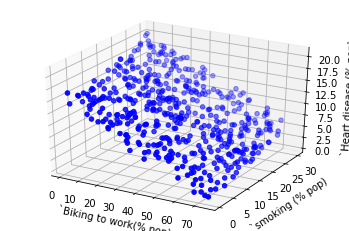

In [7]:
import numpy as np #linear algebra
import pandas as pd # data processing, csv file I/O (e.g pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting

# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('heart_data.csv')

print(df.head())

x = df.iloc[:,[0,1]].values
y = df.iloc[:, 2].values

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')

ax1.scatter(x[:,0], x[:,1], y, color='blue')

ax1.set_xlabel('`Biking to work(% pop)')
ax1.set_ylabel('`smoking (% pop)')
ax1.set_zlabel('`Heart disease (% pop)')






In [6]:
# split the data into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, 
random_state=0)


# fit the linear least-squres regression line to the training data:
regr = LinearRegression()
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'
% mean_squared_error(y_test, regr.predict(x_test)))
# The mean squared error
print('Coefficient of determination: %.2f'
% r2_score(y_test, regr.predict(x_test)))

print('predict single values: ', regr.predict(np.array([[6,1,2,7,9]])))



Coefficients:  [-0.20145698  0.17521317]
Intercept:  15.089218773332012
Mean squared error: 0.45970251
Coefficient of determination: 0.98


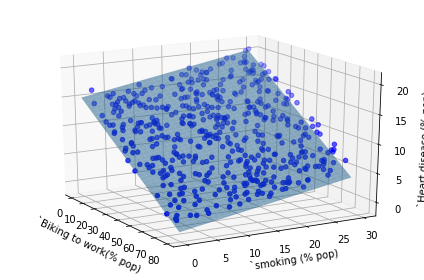

In [4]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')

ax1.scatter(x[:,0], x[:,1], y, color='blue')

x1, x2 = np.meshgrid(range(80), range(30))
z = regr.coef_[0]*x1 + regr.coef_[1]*x2 + regr.intercept_
ax1.plot_surface(x1,x2,z, alpha=0.5)
ax1.azim = -30
ax1.dist = 10
ax1.elev = 20


ax1.set_xlabel('`Biking to work(% pop)')
ax1.set_ylabel('`smoking (% pop)')
ax1.set_zlabel('`Heart disease (% pop)')

fig1.tight_layout()
fig1.savefig('LR_initial_plot.png')